datset : https://archive-ics-uci-edu.translate.goog/dataset/878/cirrhosis+patient+survival+prediction+dataset-1?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc


Mengimpor Library

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/cirrhosis.csv')

## data understanding

In [2]:
df.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


Mengecek struktur data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

cek missing value

In [4]:
print(df.isnull().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


Deskripsi dari Dataset

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


EDA to handle missing values and outliers

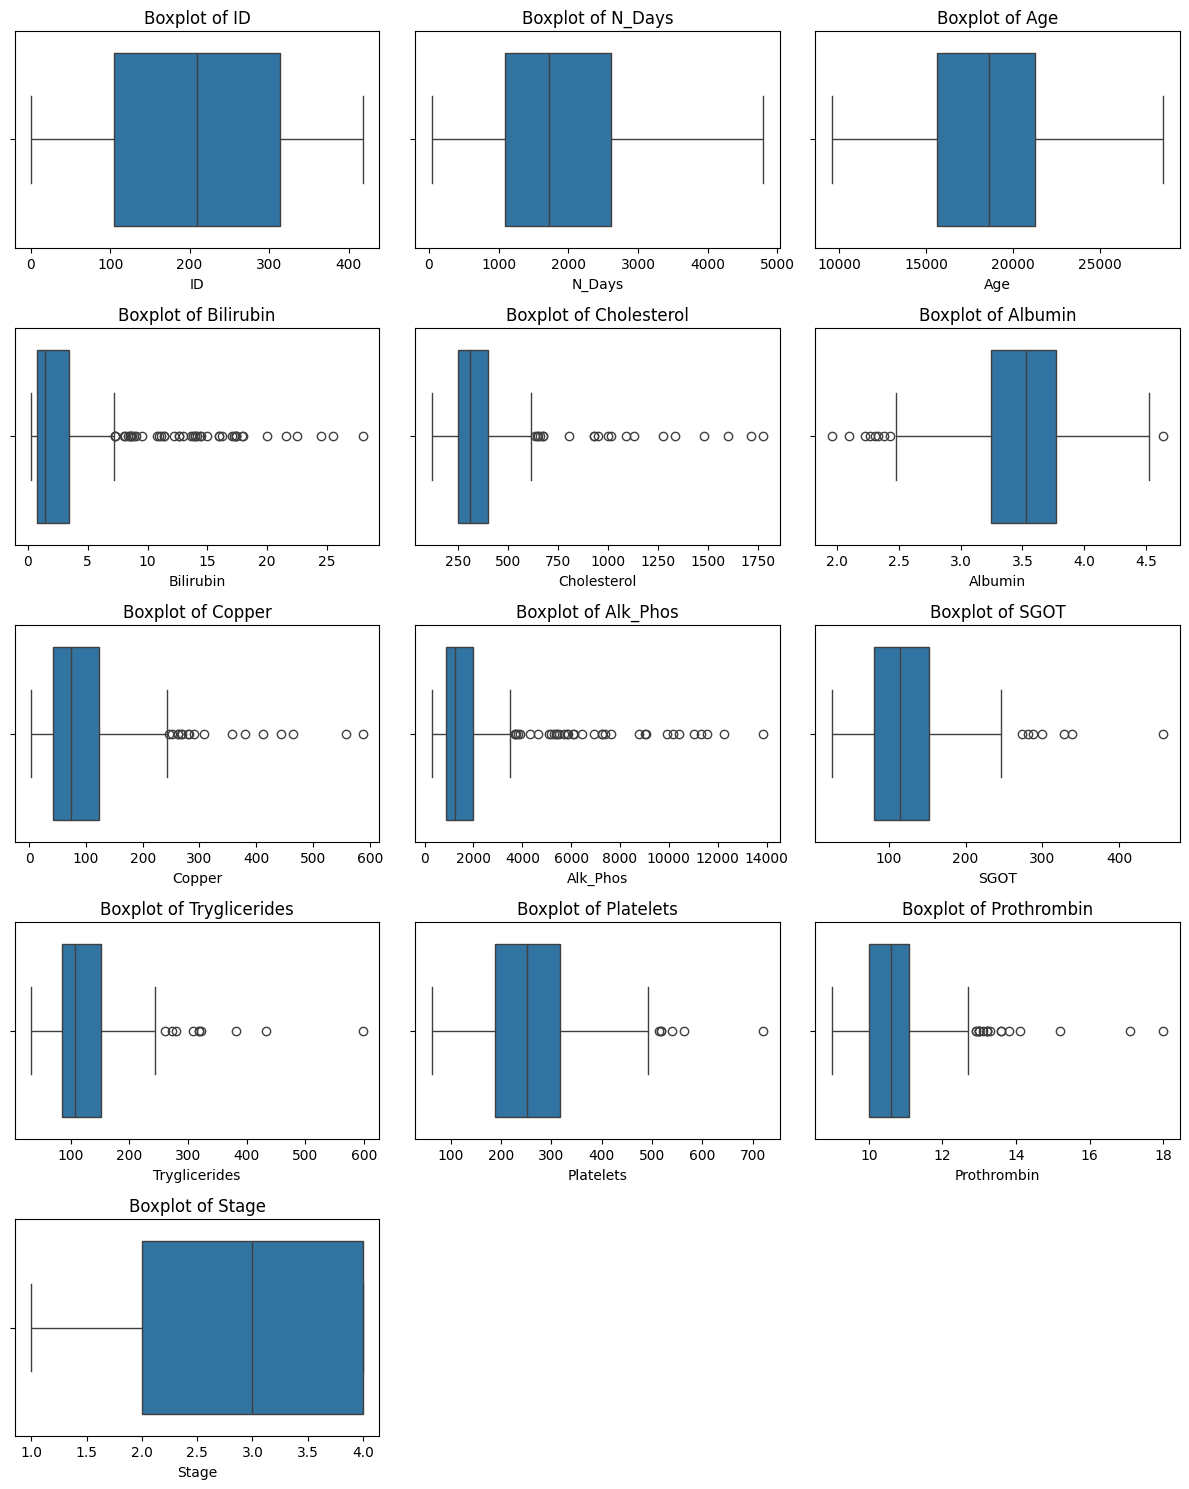

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Hitung jumlah kolom numerik
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Tentukan jumlah baris dan kolom untuk subplot grid
rows = np.ceil(num_cols / 3).astype(int)  # Menghitung berapa baris yang dibutuhkan

# Membuat plot boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, rows * 3))  # Sesuaikan tinggi berdasarkan jumlah baris

# Iterasi secara langsung melalui kolom numerik dari dataframe
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, 3, i+1)  # Gunakan grid sesuai jumlah baris yang diperlukan
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Agar plot tidak tumpang tindih
plt.show()

Perform EDA with univariate analysis

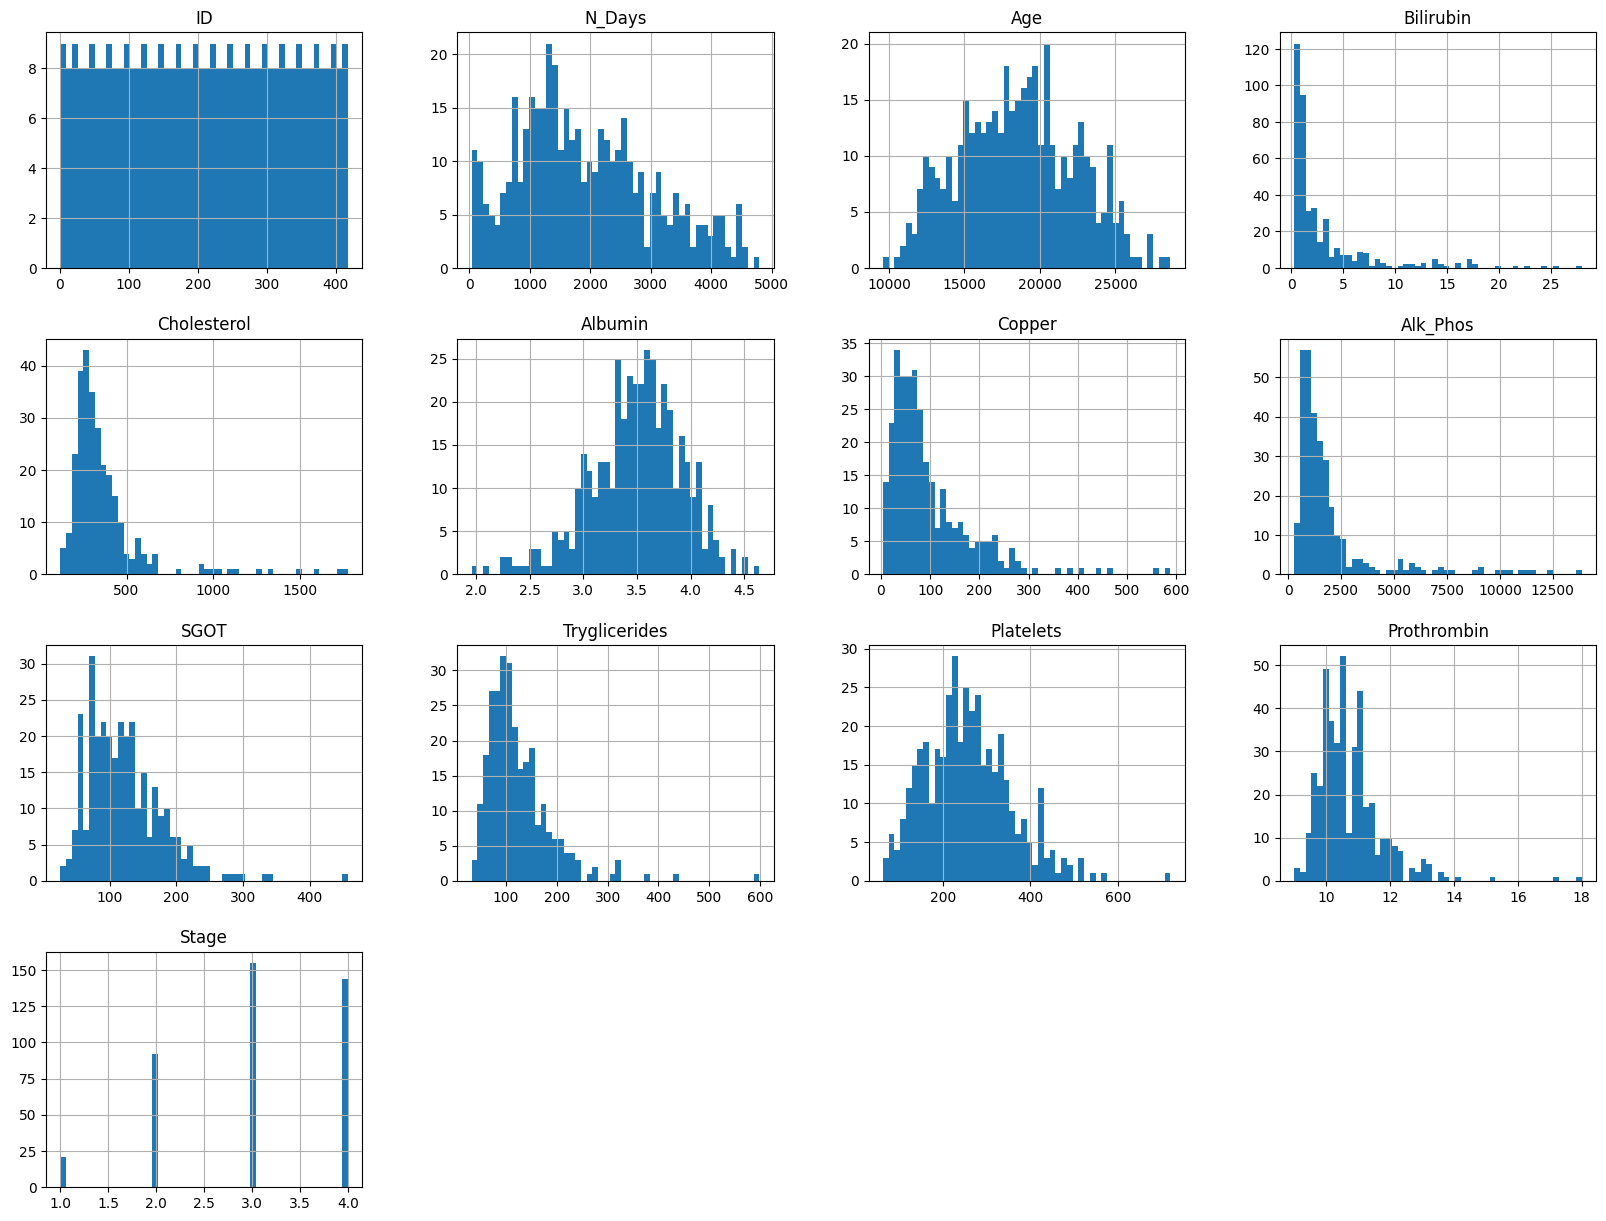

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Perform EDA with multivariate analysis

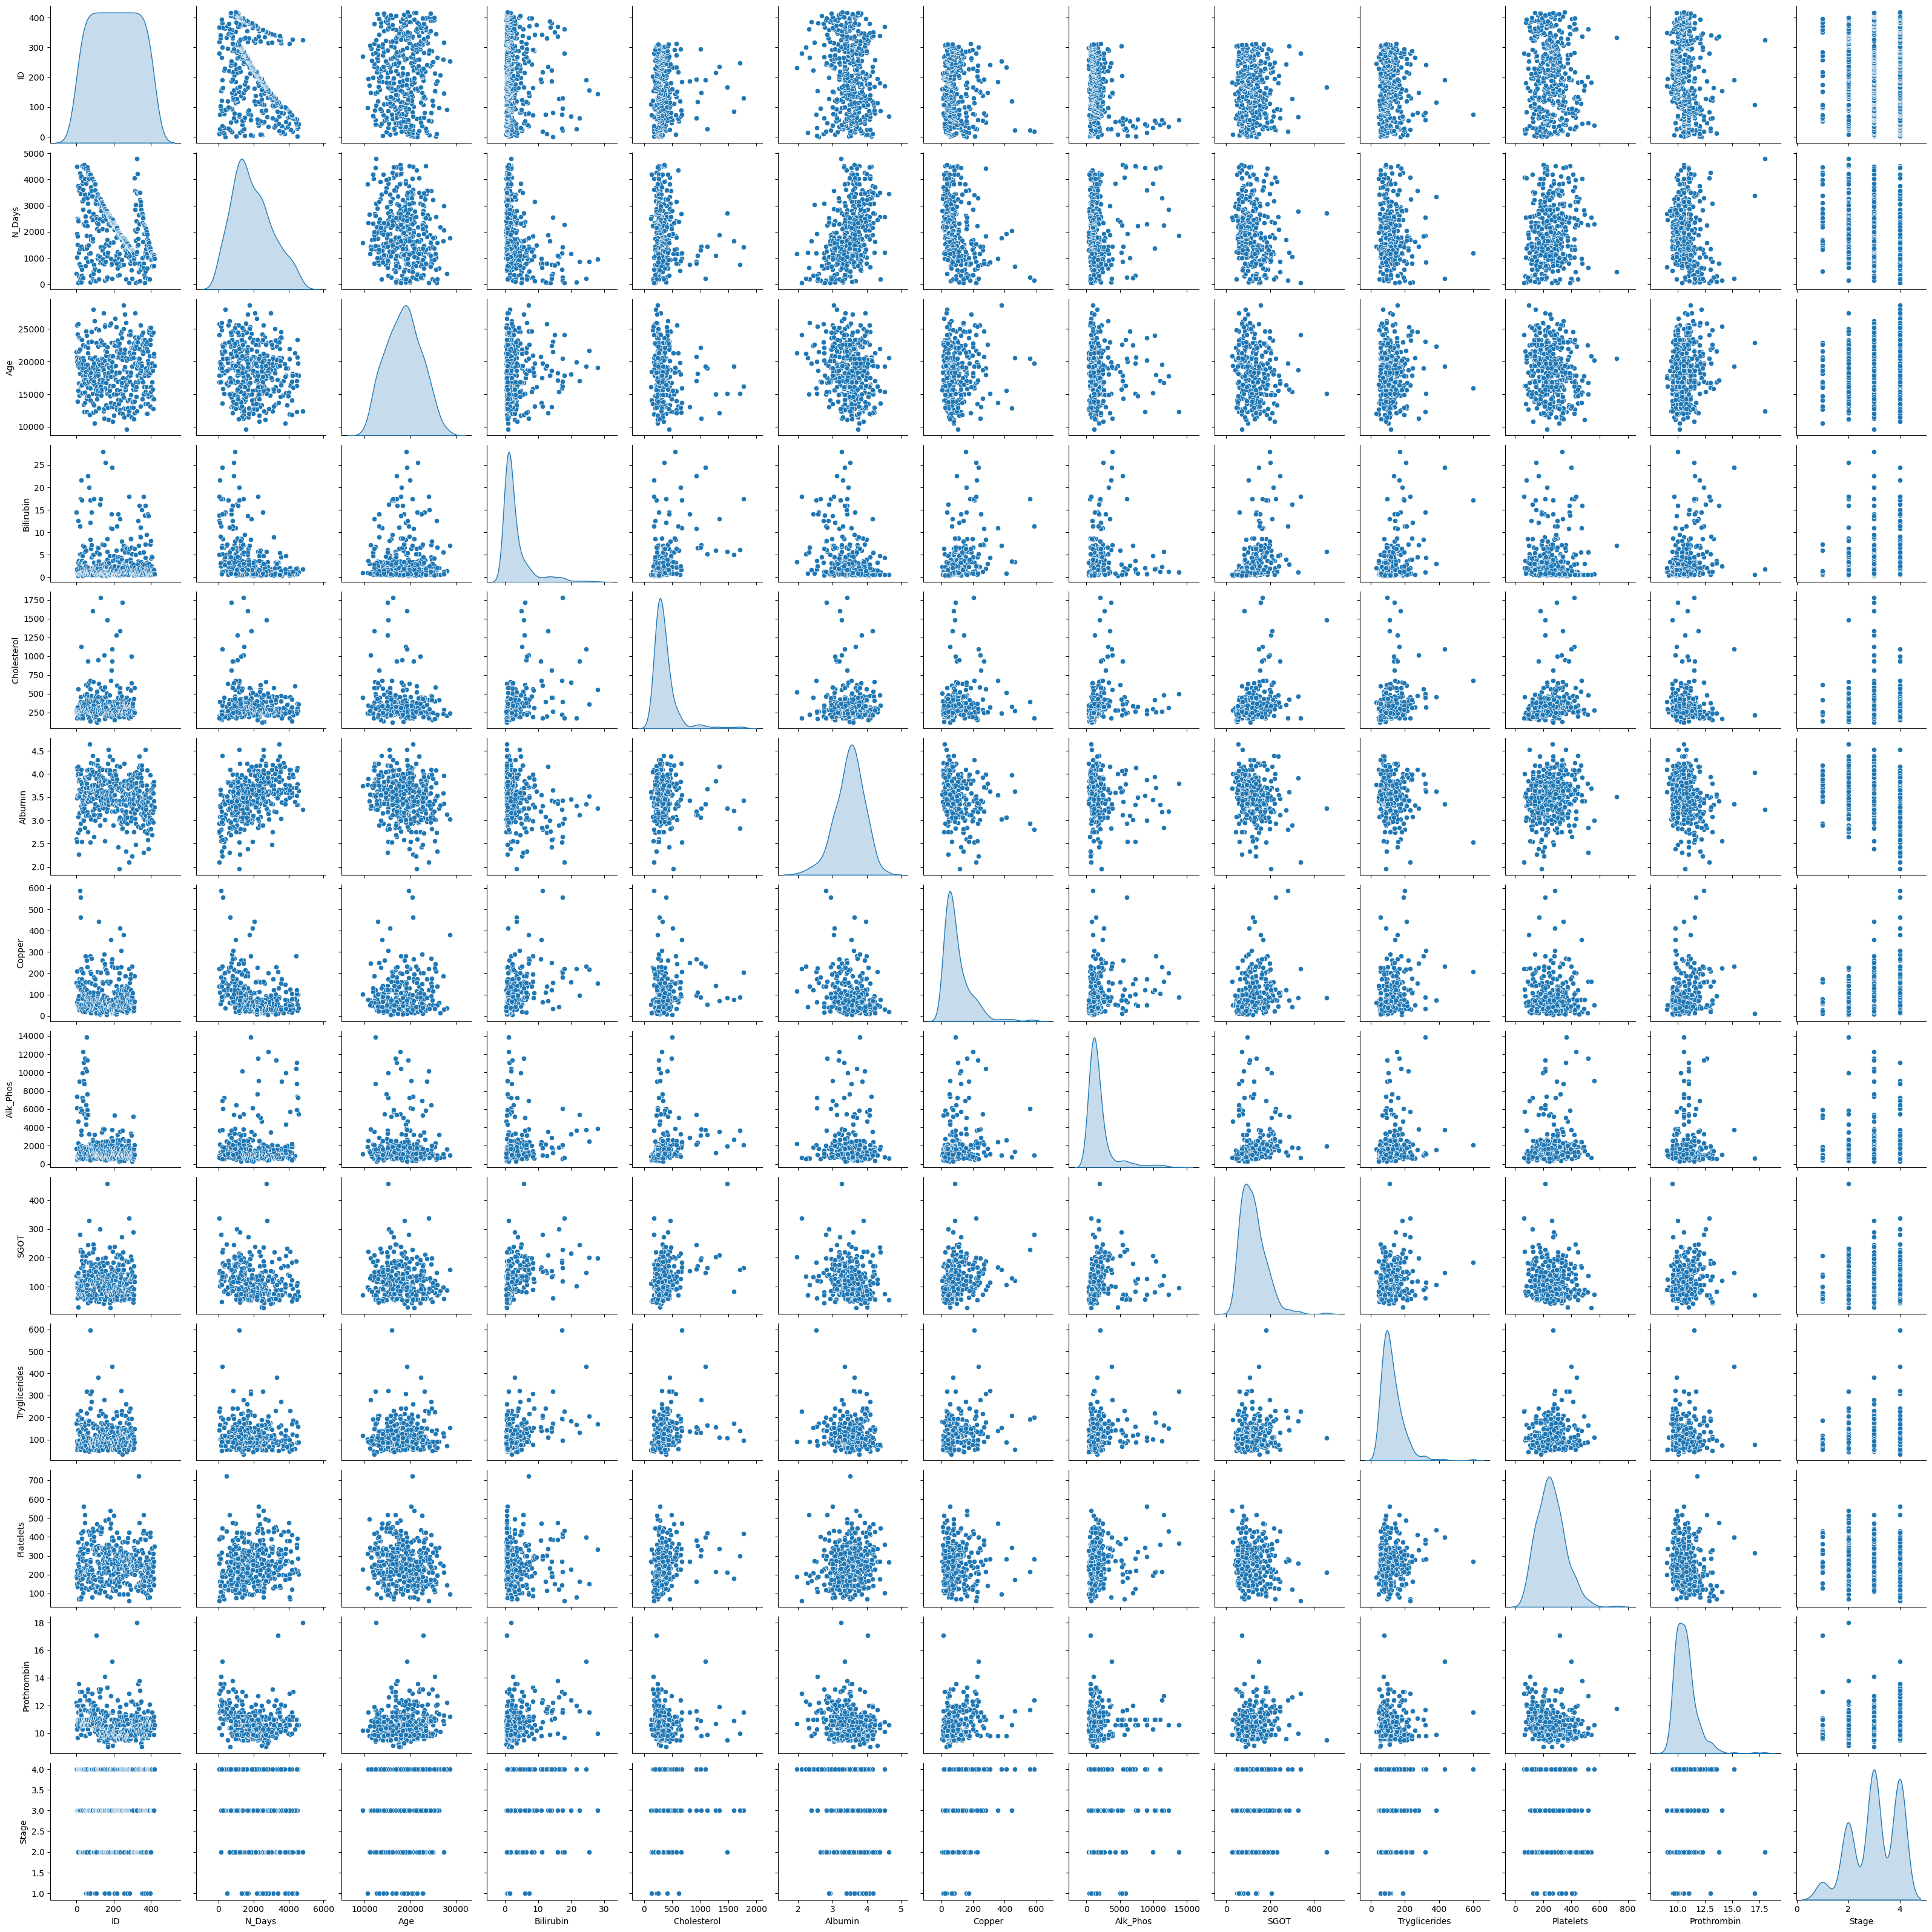

In [8]:

# Mengamati hubungan antar fitur numerik dengan fungsi pairplot
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde')

plt.show()

## Data Preparation


menggunakan rata-rata dan modus untuk mengatasi missing value

In [9]:
# Mengisi missing values untuk kolom numerik dengan mean
numeric_columns = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Drug']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Cek kembali apakah missing values sudah ditangani
print(df.isnull().sum())



ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


menangani outlier

In [10]:
# Hitung Q1 dan Q3 untuk semua kolom numerik
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Hapus outlier dari dataset berdasarkan aturan IQR
df_clean = df[~((df.select_dtypes(include=['float64', 'int64']) < (Q1 - 1.5 * IQR)) | 
                (df.select_dtypes(include=['float64', 'int64']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah outlier dihapus
print(f"Ukuran dataset setelah outlier dihapus: {df_clean.shape}")

Ukuran dataset setelah outlier dihapus: (249, 20)


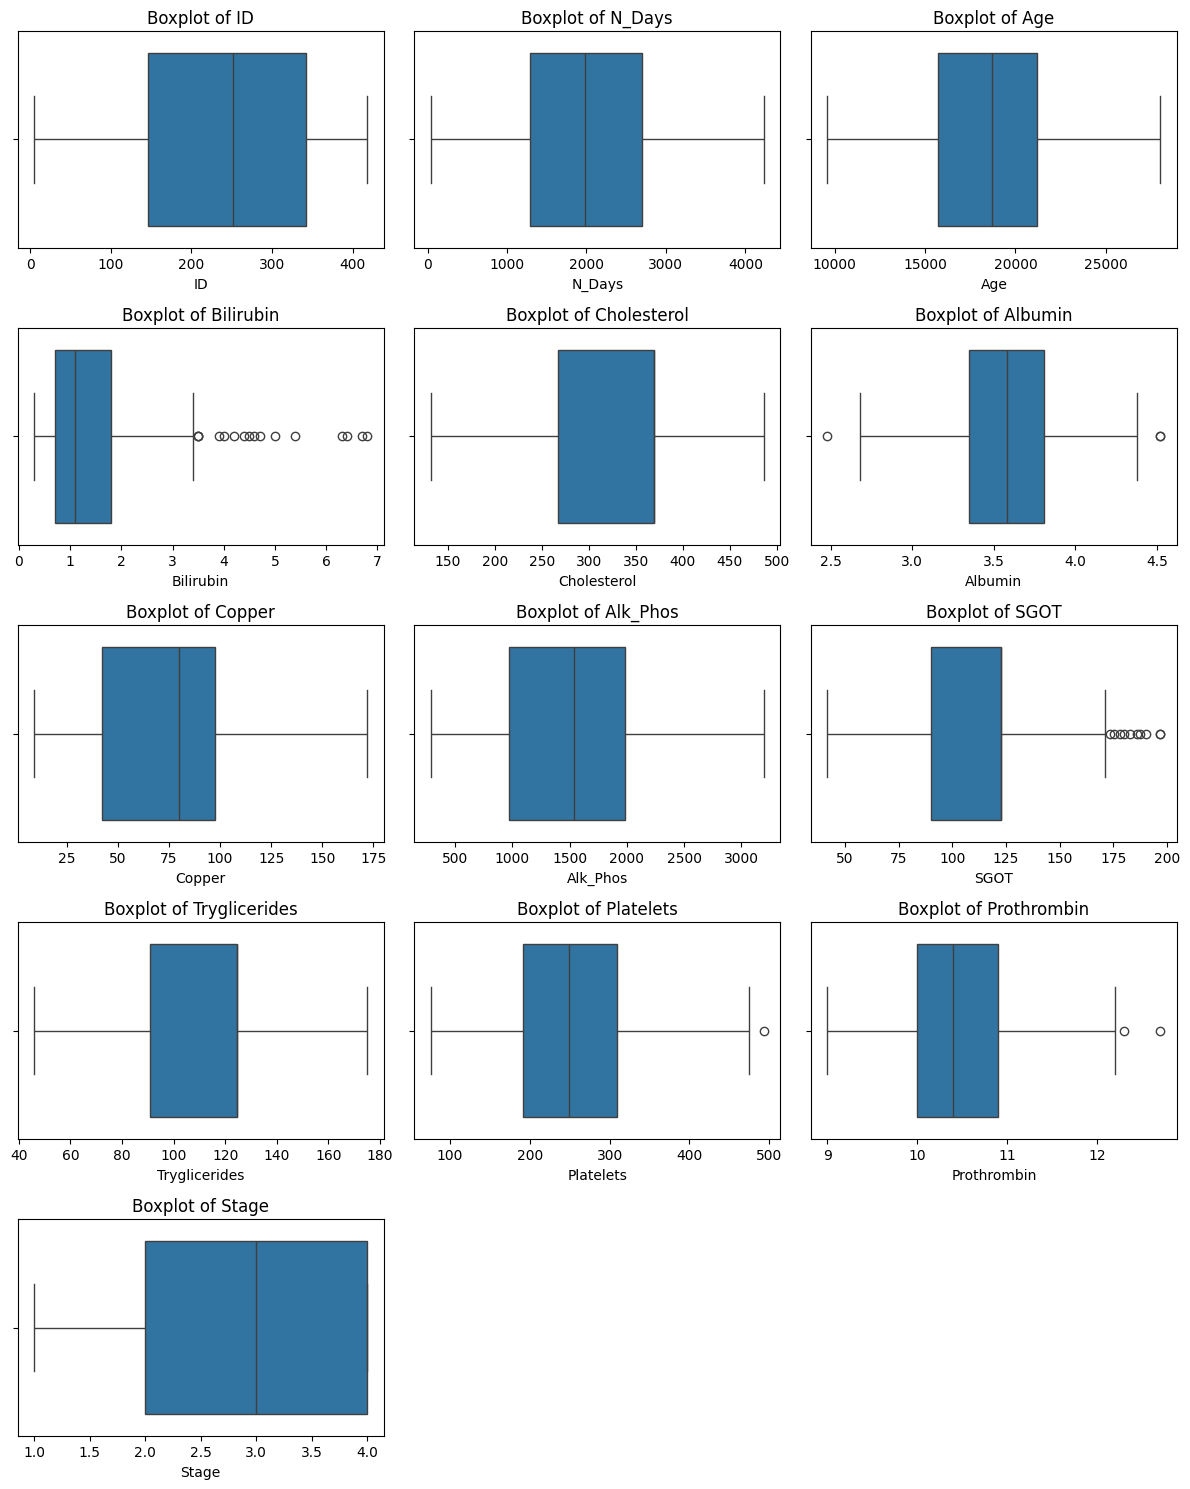

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Hitung jumlah kolom numerik
num_cols = len(df_clean.select_dtypes(include=['float64', 'int64']).columns)

# Tentukan jumlah baris dan kolom untuk subplot grid
rows = np.ceil(num_cols / 3).astype(int)  # Menghitung berapa baris yang dibutuhkan

# Membuat plot boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, rows * 3))  # Sesuaikan tinggi berdasarkan jumlah baris

# Iterasi secara langsung melalui kolom numerik dari dataframe
for i, col in enumerate(df_clean.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, 3, i+1)  # Gunakan grid sesuai jumlah baris yang diperlukan
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Agar plot tidak tumpang tindih
plt.show()

 encoding pada kolom-kolom kategorikal

In [12]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe untuk encoding
df_clean = df_clean.copy()

# Melakukan encoding pada setiap kolom kategori
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()  # Inisialisasi LabelEncoder
    df_clean[col] = le.fit_transform(df_clean[col])  # Mengubah nilai kategori menjadi integer
    label_encoders[col] = le  # Menyimpan encoder jika perlu digunakan kembali

# Cek hasil encoding
print(df_clean.head())




    ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
4    5    1504       1     1  13918    0        0             1        1   
5    6    2503       2     1  24201    0        0             1        0   
10  11    3762       2     1  19619    0        0             1        1   
12  13    3577       0     1  16688    0        0             0        0   
15  16    3672       0     1  14772    0        0             0        0   

    Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
4       0        3.4        279.0     3.53   143.0     671.0  113.15   
5       0        0.8        248.0     3.98    50.0     944.0   93.00   
10      0        1.4        259.0     4.16    46.0    1104.0   79.05   
12      0        0.7        281.0     3.85    40.0    1181.0   88.35   
15      0        0.7        204.0     3.66    28.0     685.0   72.85   

    Tryglicerides  Platelets  Prothrombin  Stage  
4            72.0  136.00000         10.9    3.0  
5       

In [13]:
# Hapus kolom 'ID' dari df_clean untuk plot
df_clean = df_clean.drop(['ID'], axis=1)

Distribusi data sebelum SMOTE:
Status
0    176
2     59
1     14
Name: count, dtype: int64


C:\Users\jstwy\AppData\Local\Temp\ipykernel_13764\3125685664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df_clean, palette='viridis')


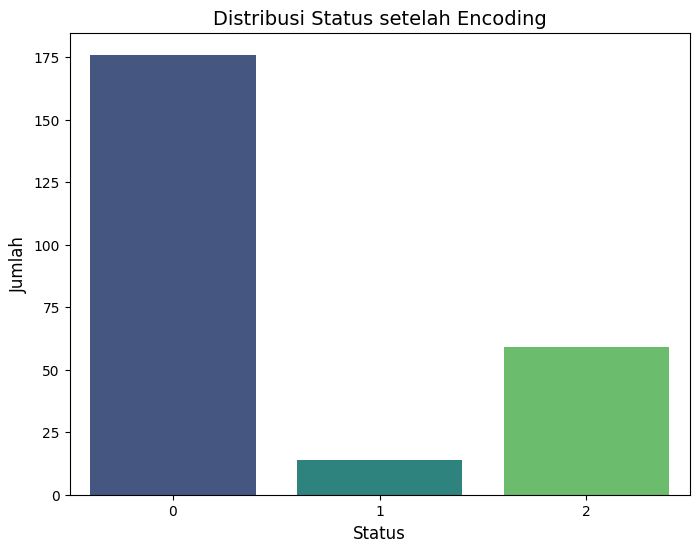

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melihat jumlah data sebelum SMOTE
print("Distribusi data sebelum SMOTE:")
print(df_clean['Status'].value_counts())

# Plot distribusi kolom 'Status' setelah encoding
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df_clean, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Status setelah Encoding', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.show()


## Tahap SMOTE

Terapkan SMOTE pada Data Pelatihan

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Memisahkan fitur (X) dan target (y)
X = df_clean.drop(['Status'], axis=1)  # Hapus kolom Status (target) 
y = df_clean['Status']

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Distribusi data setelah SMOTE:
Status
1    176
2    176
0    176
Name: count, dtype: int64


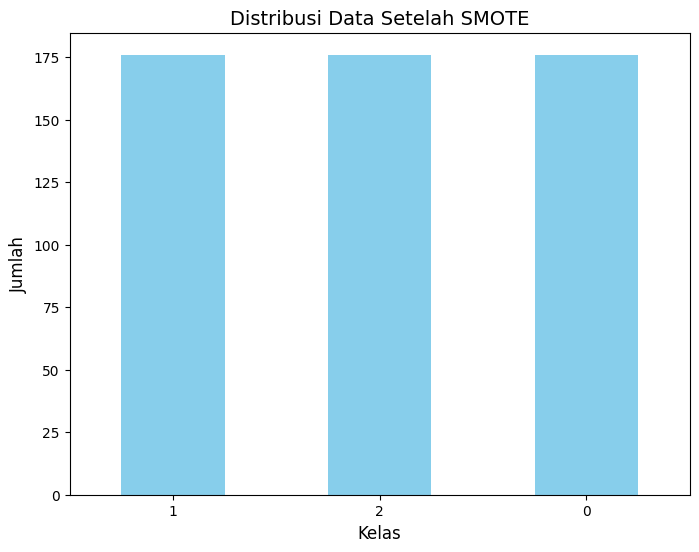

In [16]:
import pandas as pd

# Hitung jumlah sampel per kelas setelah SMOTE
class_distribution = pd.Series(y_resampled).value_counts()

# Tampilkan distribusi data
print("Distribusi data setelah SMOTE:")
print(class_distribution)

# Visualisasi distribusi data
import matplotlib.pyplot as plt
class_distribution.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Distribusi Data Setelah SMOTE', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.show()


standarisasi data, yaitu mengubah data sehingga distribusinya memiliki rata-rata (mean) 0 dan standar deviasi (standard deviation) 1.

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


Pisahkan Dataset:

In [18]:
# Split data setelah scaling
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)


svm

In [19]:
# from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Inisialisasi dan latih model SVM
svm_model = SVC(C=10, gamma=0.1, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluasi model
y_pred = svm_model.predict(X_test)

# # Evaluasi model
print("Akurasi pada data uji:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi pada data uji: 0.8962264150943396

Confusion Matrix:
[[32  3  4]
 [ 0 32  0]
 [ 4  0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.91      1.00      0.96        32
           2       0.89      0.89      0.89        35

    accuracy                           0.90       106
   macro avg       0.90      0.90      0.90       106
weighted avg       0.90      0.90      0.89       106



menguji akurasi dari data train dan test

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluasi pada data train
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Akurasi pada data train:", train_accuracy)
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data test
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Akurasi pada data test:", test_accuracy)
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


Akurasi pada data train: 0.9881516587677726

Confusion Matrix (Train):
[[134   1   2]
 [  0 144   0]
 [  2   0 139]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       137
           1       0.99      1.00      1.00       144
           2       0.99      0.99      0.99       141

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422

Akurasi pada data test: 0.8962264150943396

Confusion Matrix (Test):
[[32  3  4]
 [ 0 32  0]
 [ 4  0 31]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.91      1.00      0.96        32
           2       0.89      0.89      0.89        35

    accuracy                           0.90       106
   macro avg       0.90      0.90      0.90       106
weighte

Cross-validation membantu untuk memeriksa seberapa baik model Anda bekerja di seluruh subset data, sehingga memberikan gambaran yang lebih akurat tentang kemampuan model dalam menghadapi data yang tidak terlihat sebelumnya.

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# Tampilkan hasil cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [0.88372093 0.90697674 0.92857143 0.9047619  0.85714286 0.80952381
 0.92857143 0.83333333 0.83333333 0.88095238]
Mean cross-validation score: 0.876688815060908


In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Definisikan cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score dengan metrik akurasi
cv_results = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Cetak hasil evaluasi cross-validation
print("Akurasi per fold:", cv_results)
print("Rata-rata akurasi:", cv_results.mean())
print("Standar deviasi akurasi:", cv_results.std())


Akurasi per fold: [0.88372093 0.90697674 0.9047619  0.85714286 0.80952381 0.92857143
 0.9047619  0.73809524 0.76190476 0.9047619 ]
Rata-rata akurasi: 0.8600221483942414
Standar deviasi akurasi: 0.06365679309569908



Total True Positives (TP): 95
Total False Positives (FP): 11
Total False Negatives (FN): 11
Total True Negatives (TN): -11


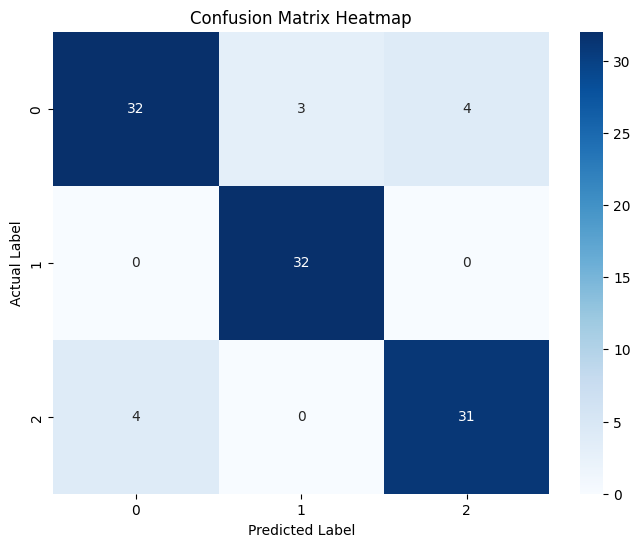

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in np.unique(y_test)],
                     columns=[f"Predicted {label}" for label in np.unique(y_test)])

# Menambahkan kolom Jumlah Prediksi Benar dan Total Instance
cm_df["Jumlah Prediksi Benar"] = cm_df.values.diagonal()  # Diagonal berisi TP
cm_df["Total Instance"] = cm_df.sum(axis=1)  # Jumlah per baris (true labels)


# Menghitung TP, FP, FN, TN secara keseluruhan
TP = np.sum(np.diag(cm))  # Jumlah True Positives (diagonal confusion matrix)
FP = np.sum(cm.sum(axis=0) - np.diag(cm))  # Jumlah False Positives
FN = np.sum(cm.sum(axis=1) - np.diag(cm))  # Jumlah False Negatives
TN = np.sum(cm) - (TP + FP + FN)  # True Negatives: Total - (TP + FP + FN)

# Menampilkan hasil perhitungan TP, FP, FN, TN secara keseluruhan
print(f"\nTotal True Positives (TP): {TP}")
print(f"Total False Positives (FP): {FP}")
print(f"Total False Negatives (FN): {FN}")
print(f"Total True Negatives (TN): {TN}")

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Menambahkan label pada sumbu x dan y
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


simpan model


In [24]:
import joblib

# Simpan model SVM ke file
joblib.dump(svm_model, 'model_Svm_sirosis.pkl')
print("Model berhasil disimpan.")


Model berhasil disimpan.


In [27]:
import joblib

# Simpan scaler ke file
joblib.dump(scaler, 'scaler_sirosis.pkl')
print("Scaler berhasil disimpan.")


Scaler berhasil disimpan.


Mengapa Model Anda Tidak Overfitting?
Berikut beberapa alasan mengapa model Anda tidak menunjukkan indikasi overfitting:

Perbandingan antara akurasi data pelatihan dan data uji:

Akurasi pada data pelatihan: 98.8%
Akurasi pada data uji: 89.6%
Biasanya, jika sebuah model overfit, kita akan melihat perbedaan yang sangat besar antara akurasi pada data pelatihan dan data uji, misalnya akurasi pelatihan 98% dan akurasi uji hanya 60% atau lebih rendah. Dalam kasus Anda, perbedaan antara akurasi pelatihan dan uji hanya sekitar 9%. Ini masih dalam rentang yang wajar dan menunjukkan bahwa model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.

Validasi silang (cros-validation) memberikan hasil yang konsisten:

Anda telah menggunakan validasi silang dan parameter terbaik (diperoleh melalui GridSearchCV) memberikan skor validasi sekitar 87.67%. Jika model sangat overfit, skor validasi akan lebih rendah dibandingkan dengan data pelatihan, tetapi hasilnya sangat dekat. Artinya, model ini tidak terlalu menyesuaikan diri dengan data pelatihan dan masih dapat menghasilkan hasil yang baik pada data yang berbeda.
Confusion Matrix dan Classification Report:

Dalam confusion matrix, Anda melihat bahwa model cukup baik dalam memprediksi sebagian besar kelas, meskipun ada beberapa kesalahan, terutama untuk kelas tertentu (kelas 0 dan 2). Ini menunjukkan model masih bisa diandalkan, tetapi tidak sepenuhnya cocok dengan data pelatihan—ini adalah tanda bahwa model tidak overfit.
Model menghasilkan performa yang seimbang antara precision, recall, dan f1-score:

Jika model overfit, misalnya pada kelas tertentu, model bisa saja memberikan precision dan recall yang sangat tinggi pada kelas pelatihan, tetapi buruk pada data uji. Namun, dalam kasus Anda, precision dan recall di semua kelas cukup konsisten antara data pelatihan dan uji. Metrik ini tidak menunjukkan adanya pola yang menunjukkan overfitting.